# Import modelflow

In [57]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from ipywidgets import interact,Dropdown,Checkbox
from IPython.display import display, clear_output,Latex, Markdown
import pandas as pd

import modeljupyter as mj
from modelvis import waterplot


from modelclass import model
model.widescreen()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

# Load model and data, and run 

In [3]:
if not 'masia' in locals():
    print('Load model')
    masia,baseline = model.modelload('Asia.pcim',run=1,silent=1)

Load model


In [4]:
from inject import inject
inject(masia)

In [32]:
masia.var_description = masia.defsub({k : v.replace('CO2','$CO^2$') for k,v in masia.var_description.items()})

In [5]:
co2_input_var = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2')]

In [6]:
co2_baseline = baseline.loc[:,co2_input_var].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))

# Variables to inputwidget

In [7]:
outvar = 'GDI GCARBR CO2 LNN'.split()
displayvar = 'WLD_CO2 ASP_CO2 G20_CO2 '

#  masia.countries_GCARBR_A is list of all countries in the model with a countries_GCARBR_A 
#  masia.countries_ASEAN is list of all countries in ASEAN 
countries_rest = [country for country in masia.countries_GCARBR_A if country not in masia.countries_ASEAN]

slidedef_allasean =  {'All ASEAN countries' : {'var': ' '.join([f'{country}_GCARBR_A' for country in masia.countries_ASEAN ])
                          , 'value': 0.0,'min':0,'max':100,'op':'+impulse','step':10,'dec':0}}
slidedef_allrest =  {'Rest of the world' : {'var': 
    ' '.join([f'{country}_GCARBR_A' for country in countries_rest])
                          , 'value': 0.0,'min':0,'max':100,'op':'+impulse','step':10,'dec':0}}
slidedef_countries = {masia.iso_dict.get(country,country)+', Extra' : 
                      {'var': f'{country}_GCARBR_A', 'value': 0.0,'min':-40,'max':40,'op':'+impulse','step':10,'dec':0} 
                      for country in  masia.countries_ASEAN}

slidedef = {**slidedef_allasean,**slidedef_allrest,**slidedef_countries}

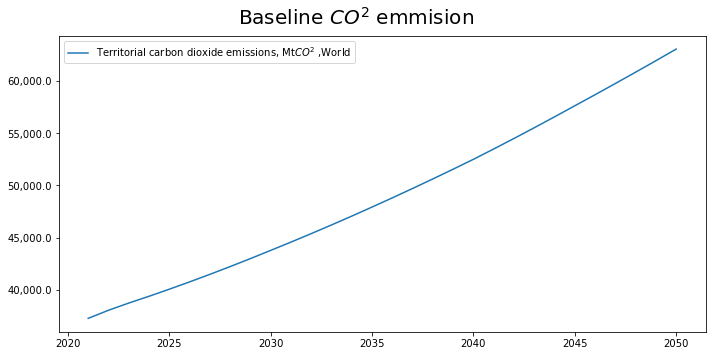

In [24]:
masia['wld_co2'].rename().plot(colrow=1,title='Baseline $CO^2$ emmision',top=0.9,ysize=5);

# Emmision with no policy 
Countries where the emmision is below the threshold are all attributed to the "small" label

In [9]:
@interact(Threshold = (0,3000,100))
def explain(Periode   = Dropdown(options = masia.current_per,value=2050),
            Threshold =700):

    waterplot(co2_baseline.loc[[Periode],:].T,autosum=1,threshold = Threshold,allsort=1,title = '$CO^2$ emmision in',top=0.88);

interactive(children=(Dropdown(description='Periode', index=29, options=(2021, 2022, 2023, 2024, 2025, 2026, 2…

# Make some policy 

In [25]:
inject(masia)
input = masia.inputwidget_asia(2021,2050,slidedef=slidedef
                   ,showout=True,varpat=displayvar,showvar=True,go_now=1)

# Where does the reduction originate
The threshold leved and year can be chosen.
Countries where the reduction is below the threshold are all attributed to the "small" label  

In [26]:

@interact(Threshold = (0,300,10))
def explain(Periode   = Dropdown(options = masia.current_per,value=2050),
            Threshold =200):
    masia.dekomp_plot('WLD_CO2',pct=0,threshold=Threshold,nametrans=masia.nametrans)
    masia.dekomp_plot_per('WLD_CO2',pct=0,threshold=Threshold,per=Periode,sort=True,nametrans=masia.nametrans)


interactive(children=(Dropdown(description='Periode', index=29, options=(2021, 2022, 2023, 2024, 2025, 2026, 2…

In [38]:
print(masia.get_eq_des('USA_EC',show_all=1))

USA_EC        : Primary energy consumption, Exojoules ,USA
USA_EC_A      : Add factor:Primary energy consumption, Exojoules ,USA
USA_EC_D      : Exo dummy:Primary energy consumption, Exojoules ,USA
USA_EC_X      : Exo value:Primary energy consumption, Exojoules ,USA
USA_EFF       : 
USA_EXR       : Exchange rate (national currency / US$) ,USA
USA_HIC       : Consumer Price Index, Period Average, 2015 = 100 ,USA
USA_YER_DOLLAR: 
WLD_PE        : Domestic price of energy, inclusive of net carbon tax, US$ per Mn kJ ,World


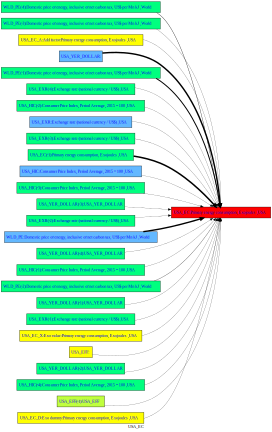

In [51]:
masia.USA_EC.tracepre(HR=0)

# Inversion of the model

In [69]:
instruments = [[f'{country}_GCARBR_A' for country in masia.countries_GCARBR_A]]
instruments

[['AFG_GCARBR_A',
  'ARM_GCARBR_A',
  'AUS_GCARBR_A',
  'AZE_GCARBR_A',
  'BGD_GCARBR_A',
  'BTN_GCARBR_A',
  'BRN_GCARBR_A',
  'KHM_GCARBR_A',
  'CHN_GCARBR_A',
  'FJI_GCARBR_A',
  'GEO_GCARBR_A',
  'HKG_GCARBR_A',
  'IND_GCARBR_A',
  'IDN_GCARBR_A',
  'IRN_GCARBR_A',
  'JPN_GCARBR_A',
  'KAZ_GCARBR_A',
  'KIR_GCARBR_A',
  'KGZ_GCARBR_A',
  'LAO_GCARBR_A',
  'MAC_GCARBR_A',
  'MYS_GCARBR_A',
  'MDV_GCARBR_A',
  'FSM_GCARBR_A',
  'MNG_GCARBR_A',
  'MMR_GCARBR_A',
  'NPL_GCARBR_A',
  'NZL_GCARBR_A',
  'PAK_GCARBR_A',
  'PNG_GCARBR_A',
  'PHL_GCARBR_A',
  'KOR_GCARBR_A',
  'RUS_GCARBR_A',
  'WSM_GCARBR_A',
  'SGP_GCARBR_A',
  'SLB_GCARBR_A',
  'LKA_GCARBR_A',
  'TJK_GCARBR_A',
  'THA_GCARBR_A',
  'TLS_GCARBR_A',
  'TON_GCARBR_A',
  'TUR_GCARBR_A',
  'TKM_GCARBR_A',
  'UZB_GCARBR_A',
  'VUT_GCARBR_A',
  'VNM_GCARBR_A']]

In [61]:
target = pd.DataFrame([55_000],index=[2050],columns=['WLD_CO2'])
target

,WLD_CO2
2050,55000


In [64]:
delay = 2050-2021
delay 

29

In [65]:
from modelinvert import targets_instruments

In [70]:
res = masia.invert(masia.basedf,target,instruments,DefaultImpuls=1,delay=29)

>> Error in     : Asia
>> In           : 2050
>> varposition   : 3181
>> Equation     : FRML <Z,EXO> KAZ_MTR =( KAZ_MTR(-1)*EXP(KAZ_MTR_A +  (-0.153974732176398+-0.152986408545611*(LOG(KAZ_MTR(-1))-LOG(KAZ_PCR(-1)+KAZ_ITR(-1)+KAZ_GCR(-1)+KAZ_XTR(-1))+LOG(KAZ_YFT(-1)/KAZ_YER(-1))+0.0879572709820191*LOG(KAZ_CMUD(-1)*KAZ_EXR(-1)/KAZ_YED(-1))-0.25*KAZ_OMS*LOG(KAZ_OILC(-1)))+0.608819054088144*((LOG(KAZ_XTR))-(LOG(KAZ_XTR(-1))))+0.112964523918026*((LOG(KAZ_PCR))-(LOG(KAZ_PCR(-1))))+0.375771246571348*((LOG(KAZ_IPR))-(LOG(KAZ_IPR(-1))))+0.0647991589052041*((LOG(KAZ_GCR+KAZ_IGR))-(LOG(KAZ_GCR(-1)+KAZ_IGR(-1))))) ) )*(1-KAZ_MTR_D)+KAZ_MTR_X*KAZ_MTR_D$
A snapshot of the data at the error point is at .errdump 
Also the .lastdf contains .errdump,  for inspecting 

Calculations of KAZ_MTR 
FRML <Z,EXO> KAZ_MTR =( KAZ_MTR(-1)*EXP(KAZ_MTR_A +  (-0.153974732176398+-0.152986408545611*(LOG(KAZ_MTR(-1))-LOG(KAZ_PCR(-1)+KAZ_ITR(-1)+KAZ_GCR(-1)+KAZ_XTR(-1))+LOG(KAZ_YFT(-1)/KAZ_YER(-1))+0.0879572709820191*LO

ValueError: math domain error